<a href="https://colab.research.google.com/github/Colley-K/capstone_projects/blob/master/8a_nu_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8a.nu EDA Report

In this notebook, I will explore:

* the distribution of ratings
* the number of ratings each user gave on average
* the number of ratings per route



##Cleaning Report

**Note:** This data was previously normalized and cleaned in the data cleaning report which you can view [here](https://colab.research.google.com/drive/195wcooDtT2XhfpRXREWmLovm8XZPNymy)

##The Initial Set Up:

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area
!ls "/content/drive/My Drive" #shows whats in your drive once its mounted

#access the OS system to work with current directories:
import os 
os.getcwd() 

Wed May 22 22:30:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

'/content'

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import hashlib
import base64


#reconfigure default settings
sns.set_palette(sns.color_palette("hls", 8))
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

##Importing CSV

In [0]:
#Turn the CSV files into data frames

ascent = pd.read_csv('drive/My Drive/Capstone/data/ascent2.csv', low_memory=False) 

#view the table
ascent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196988 entries, 0 to 1196987
Data columns (total 3 columns):
user_id    1196988 non-null int64
name_id    1196988 non-null object
rating     1196988 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.4+ MB


In [0]:
ascent.head()

,user_id,name_id,rating
0,1,b'fPrwO1eaOn1pit2sxBtnmpsLtBY=',1
1,1,b'8XEnyhQrs5p40c0RzDSJse4v2wU=',2
2,2,b'yeRHlWOfCwHC184C6h74MDjg1HY=',2
3,1,b'SkDqB7cHDX3ooiY0TBYqH6Shfjg=',3
4,1,b'vnAJW7lXQdVVILSM3TV2OrPSsJM=',2


#Ratings Distribution

In order for this recomendation system to be successful, there needs to be a good distribution of ratings. The distribution of ratings below looks sufficient for a recommendaiton system:



*   49% of the rock climbing routes are given the highest rating ("3")
*   36.5% are given the intermediate rating ("2")
* 14% of rock climbing routes are given the lowest rating ("1")


Even though the lowest rating is a smaller proportion than the highest rating, this is normal that a negative response will be in the minority.




In [0]:
ascent.rating.value_counts()

3    588117
2    437847
1    171024
Name: rating, dtype: int64

In [0]:
#seeing the distribution of ratings
ascent.rating.describe()

count    1.196988e+06
mean     2.348452e+00
std      7.160942e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: rating, dtype: float64

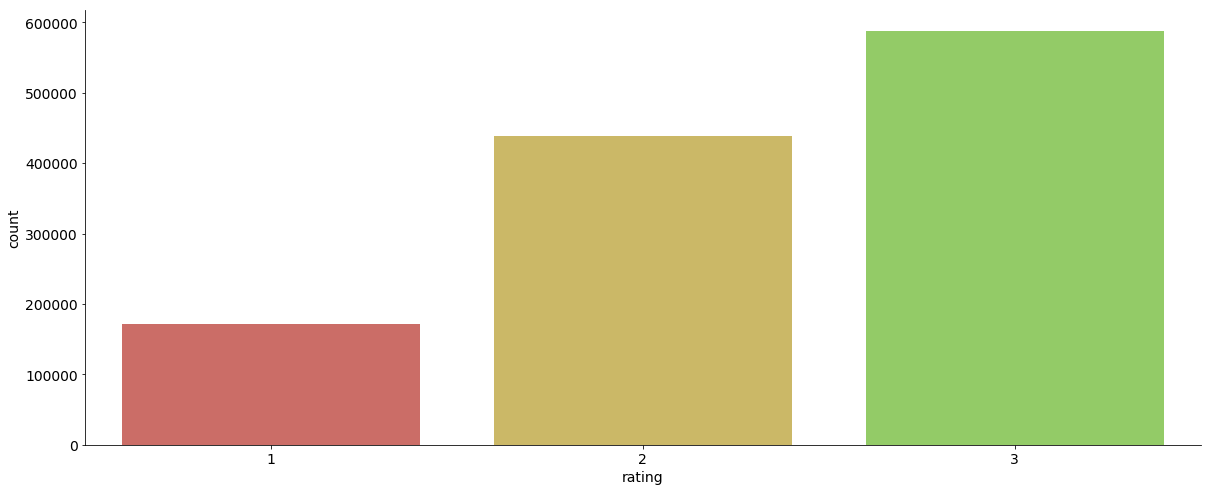

In [0]:
#graphing the distribution of values
sns.countplot(x ="rating", data= ascent)

#Distribution of Ratings given to each Route 

In order for this recomendation system to be successful, there needs to be a good distribution of ratings given to every route. 

### Findings:
* The most ratings a single route recieved was 687 ratings
* The lowest amount was only 1 rating for a route
* The average number of ratings per route was 30
* The mode was 10 ratings per route with a total of 3,622 routes with exactly ten ratings
* Only 353 routes have more than 200 ratings (thus this was excluded from the graph)

*This is a good distrbution of ratings, and will be sufficient for the model*

In [0]:
#Looking at the distribution

data = ascent.groupby('name_id')[['rating']].count() #grouping the route names by the number of ratings they recieved
data.sort_values("rating", ascending= False)[:50] #sorting the values of those ratings from greatest to least
data.rating.mode() #seeing the most frequent number of ratings (10 is the most frequent number of ratings per route with 3622 routes with exactly 10 ratings)
data[data.rating > 200].count() #seeing how many routes have more than a 200 ratings (353 routes have more than 200 ratings)
data.rating.describe()






count    39435.000000
mean        30.353442
std         37.683531
min          1.000000
25%         12.000000
50%         18.000000
75%         32.000000
max        687.000000
Name: rating, dtype: float64

In [0]:
#Top ten most frequntly rated routes
data.sort_values("rating", ascending= False)[:10]

,rating
name_id,
b'Fy8k/SqQP8Bke2HXES7huYFHAr4=',687
b'+Vc6WW3pC5m88H+ocLzgfzupeO4=',664
b'v4+Xeaa10qt0ssi49Ij49xrcXsg=',636
b'ZiFUxJB5pnxSYvjdhje1/3vm/j4=',633
b'DNUtvuOH5J/hMMkL2fALr+8TSBQ=',625
b'IrglTpSHmU+DjiZcDl7yX6tQFxY=',624
b'j/2bNUNJX+sO1ZWO7zTMgZCuh2c=',619
b'ydgskao8bMkP5aXPNNWfydZdFf4=',610
b'aXx9ZscQh5cvuEjlwVwhDRWMcv8=',568


Text(0, 0.5, 'Number of Routes with that Rating')

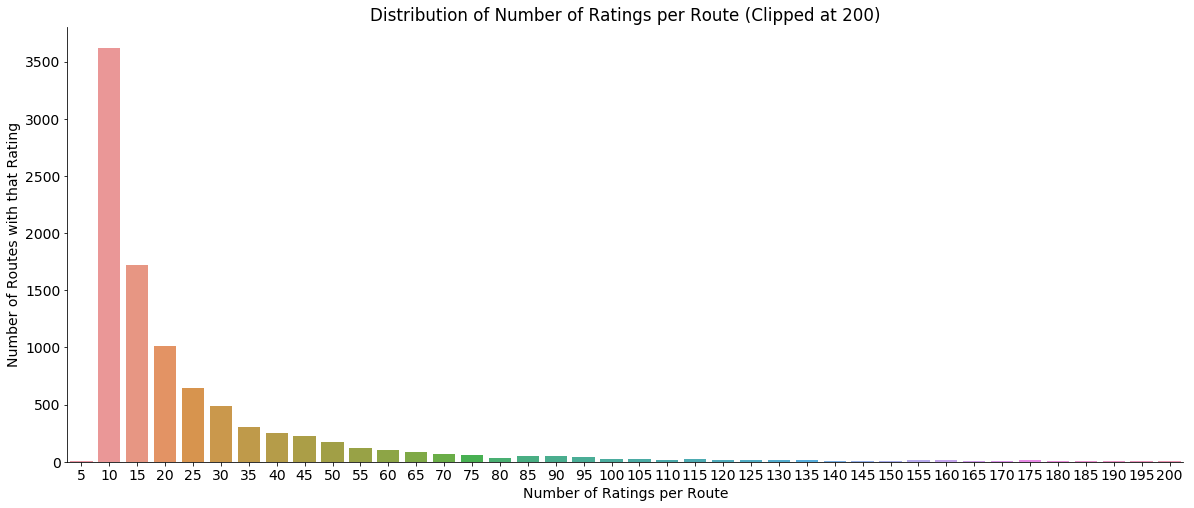

In [0]:
#plotting
route_rating= sns.countplot("rating", data= data, order = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]) #with order
plt.title("Distribution of Number of Ratings per Route (Clipped at 200)")
plt.xlabel("Number of Ratings per Route")
plt.ylabel("Number of Routes with that Rating")


#Distribution of Ratings Provided by each User 

Next, I will explore the frequency of ratings each user provided.

### Findings:
* The most ratings a single user provided was 2,088 ratings
* The majority of users (mode) only provided 1 rating 
* The average number of ratings per user is 50
* 243 users gave more than 500 ratings 

In [0]:
#Looking at the distribution

user = ascent.groupby('user_id')[['rating']].count() #grouping the route names by the number of ratings they recieved
user.sort_values("rating", ascending= False)[:50] #sorting the values of those ratings from greatest to least
user.rating.mode() #seeing the most frequent number of ratings (1 is the most frequent number of ratings per user with 3111 users given only 1 rating)
user[user.rating == 1].count() #seeing how many users gave more than a 500 ratings (243 users have more than 500 ratings)
user.rating.describe()



count    23994.000000
mean        49.886972
std        103.898628
min          1.000000
25%          3.000000
50%         12.000000
75%         48.000000
max       2088.000000
Name: rating, dtype: float64

In [0]:
#Top 10 highest number of ratings per individual user
user.sort_values("rating", ascending= False)[:10]

,rating
user_id,
7505,2088
13622,1971
5512,1951
26155,1632
19137,1611
18195,1608
23956,1409
7235,1380
23550,1325


Text(0, 0.5, 'Count of Users')

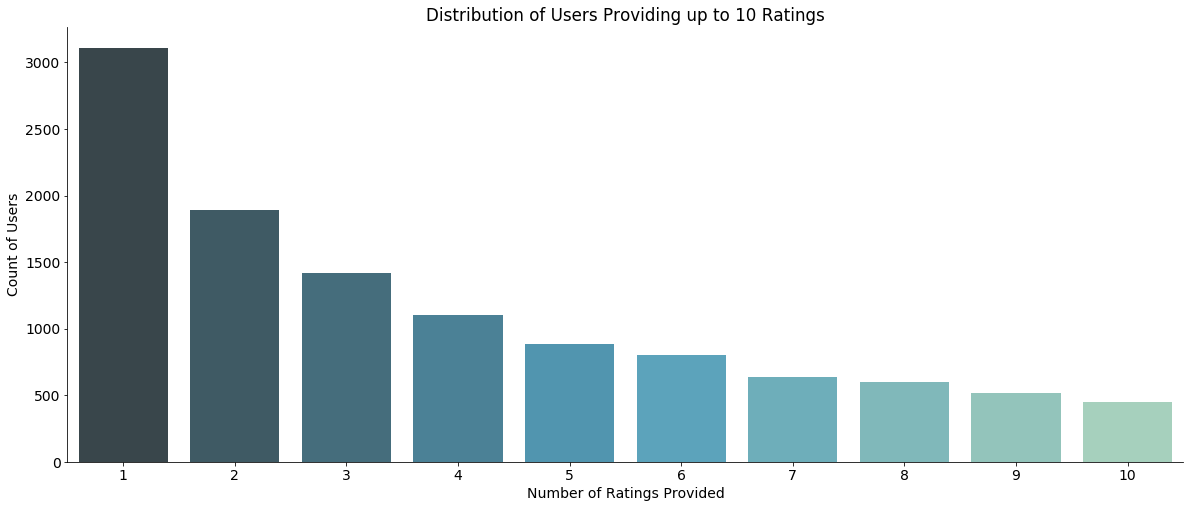

In [0]:
#Close up view of the ratings distribution
user_rating= sns.countplot("rating", data= user, order= [1,2,3,4,5,6,7,8,9,10], palette= "GnBu_d") 
plt.title("Distribution of Users Providing up to 10 Ratings")
plt.xlabel("Number of Ratings Provided")
plt.ylabel("Count of Users")

Text(0, 0.5, 'Count of Users')

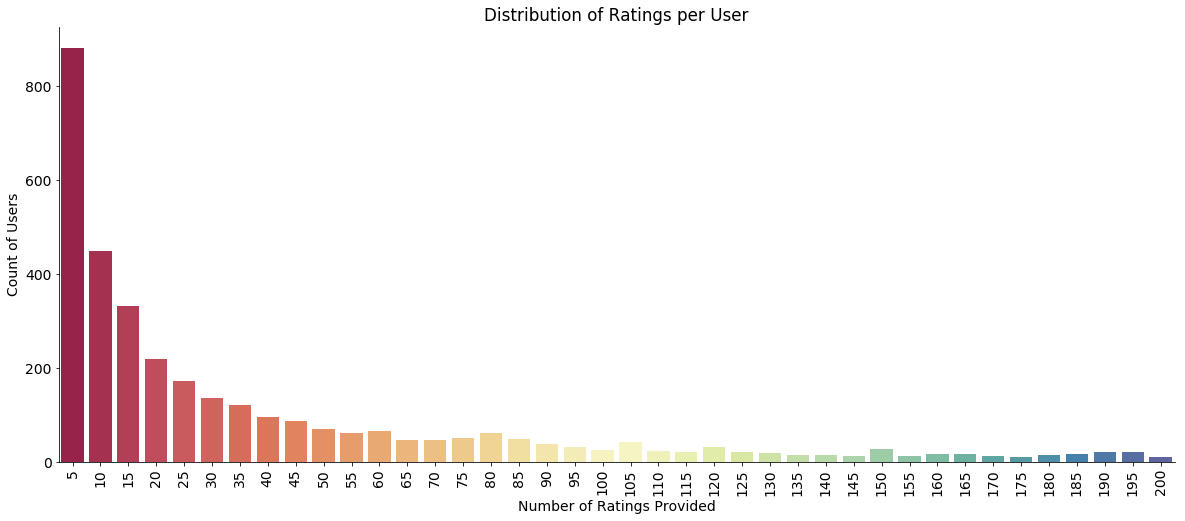

In [0]:
#wider view of the ratings distribution
user_rating= sns.countplot("rating", data= user, palette= ("Spectral"), order= [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]) 
user_rating.tick_params(axis='x', rotation=90)
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings Provided")
plt.ylabel("Count of Users")

#Next Steps
How many should I filter out???

"I’m sure you have noticed that the above two plots share the same distribution. The number of ratings per book and the number of ratings per user decay exponentially.

To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated movies and rarely rating users."



In [0]:
#suprise library example (she filtered out ALOT!)
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()